In [2]:
import numpy as np
from keras.layers import Conv2D, Dense, Flatten, Dropout, MaxPooling2D
from keras.models import Sequential, save_model
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import os
import cv2
import tensorflow as tf

Using TensorFlow backend.


In [3]:
path = 'D:/542/PROJECT/train/'

In [4]:
gestures = os.listdir(path)
print(gestures)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']


In [5]:
dict_labels = {
    'A':1,
    'B':2,
    'C':3,
    'D':4,
    'E':5,
    'F':6,
    'G':7,
    'H':8,
    'I':9,
    'K':10,
    'L':11,
    'M':12,
    'N':13,
    'O':14,
    'P':15,
    'Q':16,
    'R':17,
    'S':18,
    'T':19,
    'U':20,
    'V':21,
    'W':22,
    'X':23,
    'Y':24,
    
}

In [6]:
print(list(dict_labels.keys()))

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']


In [9]:
x, y = [], []
for ix in gestures:
    images = os.listdir(path + ix)
    for cx in images:
        img_path = path + ix + '/' + cx
        img = cv2.imread(img_path, 0)
        #print(img.shape)
        img = img.reshape((200,200,1))
        img = img/255.0
        x.append(img)
        y.append(dict_labels[ix])

In [10]:
X = np.array(x)
Y = np.array(y)
Y = np_utils.to_categorical(Y)
Y.shape

(2400, 25)

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

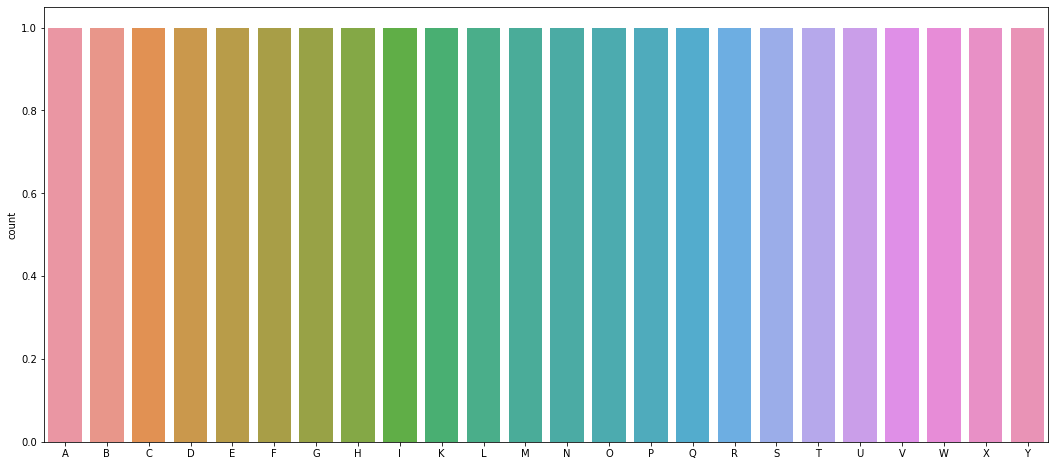

In [12]:
plt.figure(figsize = (18,8))
sns.countplot(x=list(dict_labels.keys()))

In [13]:
Y.shape

(2400, 25)

In [14]:
categories = Y.shape[1]

In [15]:
X, Y = shuffle(X, Y, random_state=0)

In [16]:
X.shape

(2400, 200, 200, 1)

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [18]:
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(1680, 200, 200, 1) (720, 200, 200, 1)
(1680, 25) (720, 25)


In [19]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [20]:
Xtr_2d = X_train.reshape(1680,200*200)
Xte_2d = X_test.reshape(720,200*200)
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(Xtr_2d, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [21]:
from sklearn.externals import joblib
joblib.dump(classifier, "KNN_model.m")

D:\Tool\Anaconda\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['KNN_model.m']

In [22]:
y_pred = classifier.predict(Xte_2d)

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test.argmax(axis=1), y_pred.argmax(axis=1)))
print(classification_report(Y_test, y_pred))

[[33  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 40  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 35  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 28  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0

D:\Tool\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Tool\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


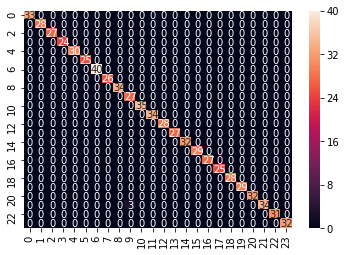

In [24]:
C = confusion_matrix(Y_test.argmax(axis=1), y_pred.argmax(axis=1))
sns.heatmap(C,annot=True) 

In [25]:
from sklearn.externals import joblib

In [26]:
joblib.dump(classifier, "KNN_model1.m")

['KNN_model1.m']